In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.feature_selection import SelectKBest,chi2,RFECV
import seaborn as sns
import time

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/drive/My Drive/precision'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/My Drive/precision/data.csv
/content/drive/My Drive/precision/correcte.ipynb
/content/drive/My Drive/precision/comparaison.ipynb
/content/drive/My Drive/precision/dataBratsplustumeur.csv
/content/drive/My Drive/precision/supprime.csv
/content/drive/My Drive/precision/data_brats.csv
/content/drive/My Drive/precision/Brats2020/BraTS20_Training_208/BraTS20_Training_208_flair.nii
/content/drive/My Drive/precision/Brats2020/BraTS20_Training_208/BraTS20_Training_208_t1.nii
/content/drive/My Drive/precision/Brats2020/BraTS20_Training_208/BraTS20_Training_208_seg.nii
/content/drive/My Drive/precision/Brats2020/BraTS20_Training_208/BraTS20_Training_208_t1ce.nii
/content/drive/My Drive/precision/Brats2020/BraTS20_Training_208/BraTS20_Training_208_t2.nii
/content/drive/My Drive/precision/Brats2020/BraTS20_Training_207/BraTS20_Training_207_flair.nii
/content/drive/My Drive/precision/Brats2020/BraTS20_Training_207/BraTS20_Training_207_t1.nii
/content/drive/My Drive/precision/Brats202

In [37]:
df = pd.read_csv("/content/drive/My Drive/precision/data_RFE.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           239 non-null    object 
 1   10Percentile                 239 non-null    float64
 2   90Percentile                 239 non-null    float64
 3   Energy                       239 non-null    float64
 4   Entropy                      239 non-null    float64
 5   InterquartileRange           239 non-null    float64
 6   Kurtosis                     239 non-null    float64
 7   Maximum                      239 non-null    float64
 8   MeanAbsoluteDeviation        239 non-null    float64
 9   Mean                         239 non-null    float64
 10  Median                       239 non-null    float64
 11  Minimum                      239 non-null    float64
 12  Range                        239 non-null    float64
 13  RobustMeanAbsoluteDe

,id,10Percentile,90Percentile,Energy,Entropy,InterquartileRange,Kurtosis,Maximum,MeanAbsoluteDeviation,Mean,Median,Minimum,Range,RobustMeanAbsoluteDeviation,RootMeanSquared,Skewness,TotalEnergy,Uniformity,Variance,diagnosis
0,Brats17_TCIA_331,536.0,750.0,3.111775e+08,3.866283,112.25,4.032018,953.0,71.065048,643.437500,641.0,394.0,559.0,46.512441,650.227258,0.548493,3.111775e+08,0.083563,8783.670007,1
1,Brats17_TCIA_332,330.4,508.0,1.129536e+09,3.411143,71.00,3.786013,632.0,51.616230,428.782289,435.0,199.0,433.0,31.299912,434.428148,-0.585346,1.129536e+09,0.120538,4873.564465,1
2,Brats17_TCIA_335,182.0,396.0,1.202952e+09,3.373271,164.00,1.543203,471.0,76.041515,297.042053,318.0,117.0,354.0,65.206090,308.655554,-0.233349,1.202952e+09,0.108310,7034.270109,1
3,Brats17_TCIA_338,231.0,338.0,2.553628e+08,2.881545,55.00,3.763767,449.0,34.442067,285.089693,283.0,133.0,316.0,22.898203,288.597641,0.066007,2.553628e+08,0.166115,2012.465210,0
4,Brats17_TCIA_343,132.0,195.0,3.127860e+07,2.079769,34.00,2.880471,215.0,19.932968,161.889460,162.0,63.0,152.0,14.588893,163.714920,-0.127583,3.127860e+07,0.265740,594.377670,0


In [42]:

col = df.columns
X = df.drop(['id','diagnosis','Skewness'], axis = 1)
y = df['diagnosis']

In [43]:
X.describe()

,10Percentile,90Percentile,Energy,Entropy,InterquartileRange,Kurtosis,Maximum,MeanAbsoluteDeviation,Mean,Median,Minimum,Range,RobustMeanAbsoluteDeviation,RootMeanSquared,TotalEnergy,Uniformity,Variance
count,239.000000,239.000000,2.390000e+02,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,2.390000e+02,239.000000,239.000000
mean,329.638075,526.892887,3.372716e+09,3.347133,104.176778,4.122064,707.309623,62.235337,428.321516,428.357741,142.430962,564.878661,43.754384,436.903117,3.372716e+09,0.140470,8573.968902
std,180.435676,256.360042,7.060623e+09,0.804884,78.298575,2.670959,337.714122,41.799185,212.949592,215.747637,134.383851,306.317567,32.662864,215.663294,7.060623e+09,0.097249,12947.405115
min,18.000000,63.000000,3.326247e+06,0.230321,5.000000,1.385488,90.000000,3.554329,57.503489,57.000000,0.000000,65.000000,2.578293,57.682190,3.326247e+06,0.032568,0.145342
25%,215.500000,378.000000,3.443847e+08,2.892981,59.000000,2.874715,484.500000,37.044771,297.205641,301.500000,50.000000,350.500000,24.987334,305.330590,3.443847e+08,0.083775,2328.814415
50%,290.100000,468.000000,1.107118e+09,3.373271,83.000000,3.622011,638.000000,51.868800,380.462258,381.000000,102.000000,509.000000,35.117161,387.606303,1.107118e+09,0.115761,4508.082751
75%,403.750000,615.500000,2.868253e+09,3.821725,117.500000,4.490978,856.000000,71.065048,504.248072,512.000000,194.000000,711.000000,49.775607,508.390964,2.868253e+09,0.165168,8714.148052
max,1269.000000,1840.200000,6.255406e+10,5.171818,633.000000,31.261050,2336.000000,292.540078,1525.794995,1500.000000,773.000000,1751.000000,259.063988,1542.443760,6.255406e+10,0.931512,98968.979609


In [44]:
# Removing cols by looking at heatmap (Minimal Feature selection)
from sklearn.model_selection import train_test_split
drop_col = ['10Percentile',	'90Percentile',	'RootMeanSquared',	'Entropy',
            'Kurtosis',	'Range','RobustMeanAbsoluteDeviation',
            	'TotalEnergy',	'Uniformity']

x_train1,x_test1,y_train1,y_test1 = train_test_split(X,y,test_size=0.3,random_state=42)


In [45]:
#Univariate feature selection
select_feature = SelectKBest(chi2,k=10).fit(x_train1,y_train1)


In [25]:
!pip install catboost

     |████████████████████████████████| 66.3MB 54kB/s 


In [46]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from  sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from xgboost import  XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
import lightgbm as lgb
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import BernoulliNB

lda = LinearDiscriminantAnalysis(tol=0.01).fit(x_train1,y_train1)   
sgd = SGDClassifier(max_iter=1500, tol=0.01).fit(x_train1,y_train1)    
mlp = MLPClassifier(random_state=42).fit(x_train1,y_train1)  #neural Network model  
bnb = BernoulliNB().fit(x_train1,y_train1)                 
lgr = LogisticRegression(C=1.0, random_state=0, max_iter=10).fit(x_train1,y_train1)    #       
dtc = DecisionTreeClassifier(random_state=0).fit(x_train1,y_train1) 
rfc = RandomForestClassifier(n_estimators=70,max_depth=2, random_state=42).fit(x_train1,y_train1)    
xgb = XGBClassifier(n_estimators=63, max_depth=3,random_state=0).fit(x_train1,y_train1)            
svm = SVC().fit(x_train1,y_train1)  
gnb = GaussianNB().fit(x_train1,y_train1)    
KNN = KNeighborsClassifier(n_neighbors=15).fit(x_train1,y_train1)    
cat = CatBoostClassifier(iterations=109).fit(x_train1,y_train1)    
lgb = lgb.LGBMClassifier( n_estimators=100).fit(x_train1,y_train1)    
abc = AdaBoostClassifier(n_estimators=100).fit(x_train1,y_train1)   

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Learning rate set to 0.03662
0:	learn: 0.6879592	total: 8.07ms	remaining: 871ms
1:	learn: 0.6808420	total: 11.7ms	remaining: 627ms
2:	learn: 0.6756801	total: 14.8ms	remaining: 522ms
3:	learn: 0.6709062	total: 17.9ms	remaining: 470ms
4:	learn: 0.6661261	total: 21ms	remaining: 436ms
5:	learn: 0.6619433	total: 23.9ms	remaining: 410ms
6:	learn: 0.6578261	total: 26.9ms	remaining: 393ms
7:	learn: 0.6529720	total: 30.1ms	remaining: 380ms
8:	learn: 0.6489475	total: 33.2ms	remaining: 369ms
9:	learn: 0.6434567	total: 36.3ms	remaining: 359ms
10:	learn: 0.6404206	total: 39.3ms	remaining: 350ms
11:	learn: 0.6359879	total: 42.4ms	remaining: 343ms
12:	learn: 0.6326012	total: 45.4ms	remaining: 335ms
13:	learn: 0.6293634	total: 48.4ms	remaining: 329ms
14:	learn: 0.6256682	total: 51.4ms	remaining: 322ms
15:	learn: 0.6227308	total: 54.3ms	remaining: 316ms
16:	learn: 0.6194825	total: 57.2ms	remaining: 310ms
17:	learn: 0.6162555	total: 60.2ms	remaining: 304ms
18:	learn: 0.6124870	total: 63.1ms	remaining: 2

In [47]:
lda_pred= lda.predict(x_test1)
sgd_pred = sgd.predict(x_test1)
mlp_pred = mlp.predict(x_test1)
bnb_pred = bnb.predict(x_test1)
lgr_pred = lgr.predict(x_test1)
dtc_pred = dtc.predict(x_test1)
rfc_pred = rfc.predict(x_test1)
xgb_pred = xgb.predict(x_test1)
svm_pred = svm.predict(x_test1)
gnb_pred = gnb.predict(x_test1)
knn_pred = KNN.predict(x_test1)
cat_pred = cat.predict(x_test1)
lgb_pred =lgb.predict(x_test1)
abc_pred = abc.predict(x_test1)


In [48]:
names = ['LDA','SGD','MLP','BernouilliNB','LogisticRegression','Tree','RandomForest','XGBoost','SVM','Gaussian NB','KNN','Catboost','Lightboost','Adaboost']
models =[accuracy_score(y_test1,lda_pred)*100,accuracy_score(y_test1,sgd_pred)*100,accuracy_score(y_test1,mlp_pred)*100,accuracy_score(y_test1,bnb_pred)*100,accuracy_score(y_test1,lgr_pred)*100,accuracy_score(y_test1,dtc_pred)*100,accuracy_score(y_test1,rfc_pred)*100,accuracy_score(y_test1,xgb_pred)*100,accuracy_score(y_test1,svm_pred)*100,accuracy_score(y_test1,gnb_pred)*100,accuracy_score(y_test1,knn_pred)*100,accuracy_score(y_test1,cat_pred)*100,accuracy_score(y_test1,lgb_pred)*100,accuracy_score(y_test1,abc_pred)*100]
print("The accuracy is LDA",accuracy_score(y_test1,lda_pred)*100)
print("The accuracy is SGDClassifier",accuracy_score(y_test1,sgd_pred)*100)
print("The accuracy is MLPClassifier(Neural Network)",accuracy_score(y_test1,mlp_pred)*100)
print("The accuracy is BernouilliNB",accuracy_score(y_test1,bnb_pred)*100)
print("The accuracy is LogisticRegression",accuracy_score(y_test1,lgr_pred)*100)
print("The accuracy is Tree",accuracy_score(y_test1,dtc_pred)*100)
print("The accuracy is RandomForest",accuracy_score(y_test1,rfc_pred)*100)
print("The accuracy is XGBoost",accuracy_score(y_test1,xgb_pred)*100)
print("The accuracy is SVM",accuracy_score(y_test1,svm_pred)*100)
print("The accuracy is Gaussian NB", accuracy_score(y_test1,gnb_pred)*100)
print("The accuaracy is KNN(K-nearest neighbors)", accuracy_score(y_test1,knn_pred)*100)
print("The accuracy is Catboost",accuracy_score(y_test1,cat_pred)*100)
print("The accuracy is Lightboost",accuracy_score(y_test1,lgb_pred)*100)
print("The accuracy is Adaboost",accuracy_score(y_test1,abc_pred)*100)

The accuracy is LDA 72.22222222222221
The accuracy is SGDClassifier 73.61111111111111
The accuracy is MLPClassifier(Neural Network) 73.61111111111111
The accuracy is BernouilliNB 73.61111111111111
The accuracy is LogisticRegression 73.61111111111111
The accuracy is Tree 70.83333333333334
The accuracy is RandomForest 76.38888888888889
The accuracy is XGBoost 81.94444444444444
The accuracy is SVM 73.61111111111111
The accuracy is Gaussian NB 37.5
The accuaracy is KNN(K-nearest neighbors) 80.55555555555556
The accuracy is Catboost 77.77777777777779
The accuracy is Lightboost 79.16666666666666
The accuracy is Adaboost 79.16666666666666


In [49]:
print(models)
print(names)

[72.22222222222221, 73.61111111111111, 73.61111111111111, 73.61111111111111, 73.61111111111111, 70.83333333333334, 76.38888888888889, 81.94444444444444, 73.61111111111111, 37.5, 80.55555555555556, 77.77777777777779, 79.16666666666666, 79.16666666666666]
['LDA', 'SGD', 'MLP', 'BernouilliNB', 'LogisticRegression', 'Tree', 'RandomForest', 'XGBoost', 'SVM', 'Gaussian NB', 'KNN', 'Catboost', 'Lightboost', 'Adaboost']


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


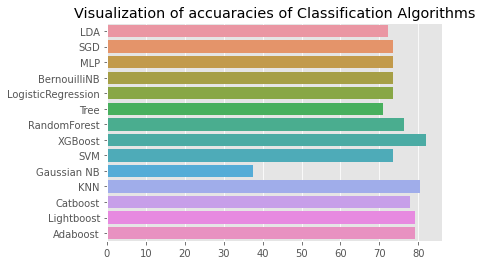

In [50]:
sns.set_colorcodes=True
plt.title('Visualization of accuaracies of Classification Algorithms')
sns.barplot(models,names)

There is a highest accuracy of 98.2%

Suite à l'analyse prédictive de tous ces algorithmes de classification, XGBoost obtient le plus haut score avec 82%